In [ ]:
"Installing Open-CV"
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
"Importing libraries"
import numpy as np
import cv2
#from google.colab.patches import cv2_imshow

In [2]:
#here 0 is used to read in grey scale 
# To read from Gcollab - img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/271.jpg',0)
img = cv2.imread('img.jpg',0)

In [3]:
print(img)

[[199 200 200 ... 166 167 167]
 [199 199 200 ... 166 167 168]
 [198 198 199 ... 165 167 168]
 ...
 [162 163 164 ...  23  20  21]
 [164 164 165 ...  16  12  13]
 [166 166 166 ...  30  27  20]]


In [4]:
import matplotlib.pyplot as plt

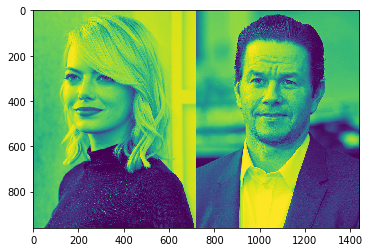

In [5]:
plt.imshow(img)

In [6]:
while True: 
  cv2.imshow('result',img)
#cv2_imshow(img)- Google colab
  # 27- Ascii number - Pressing Escape will stop 
  if cv2.waitKey(2) == 27 :
    break;
cv2.destroyAllWindows()

In [7]:
haar_data = cv2.CascadeClassifier('data.xml')

In [8]:
haar_data.detectMultiScale(img)

array([[ 52, 153, 378, 378],
       [867, 159, 388, 388]], dtype=int32)

In [9]:
# cv2.rectangle(img, (x,y),(w,h),(b,g,r),boder_thickness)

In [10]:
while True: 
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces: 
        cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,255),4)
    cv2.imshow('result', img)
    #27- Ascii number
    if cv2.waitKey(2) == 27 :
        break;
cv2.destroyAllWindows()

In [15]:
capture = cv2.VideoCapture(0) # to initialize camera 
data = [] # to store face data 
while True:
    flag, img = capture.read() # read video frame by frame and return true/false and one frame at a time 
    if flag: # will check if flag is True (if camera is available or not)
        faces = haar_data.detectMultiScale(img)  # detecting face from the frame 
        for x,y,w,h in faces: # fetching x,y,w,h of face detected in frame
            cv2.rectangle(img, (x,y), (x+w, y+h), (255,0, 255), 4) # drawing rectange on face
            face = img[y:y+h, x:x+w, :] # slicing only face from the frame 
            face = cv2.resize(face, (50,50)) # resizing all faces to 50 x 50, so that all images will be of same size 
            print(len(data)) 
            if len(data) < 200: # condition for only storing 200 images
                data.append(face) # storing face data 
        cv2.imshow('result', img) # to show the window 
        #27 - ASCII of Escape 
        if cv2.waitKey(2) == 27 or len(data) >= 200: # break Loop if escaped is pressed or 200 faces are stored
            break
capture.release() # release the camera object holded by openCV 
cv2.destroyAllWindows() # close all the windows opened by opency

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
200


In [12]:
import numpy as np

In [13]:
# When there are single array then we can do like but when we have more than the two dimensional array we will not be able to split so we use the above code
x= np.array([3,2,54,6])

In [14]:
np.save('without_mask.npy',data)

In [16]:
# We will rerun the same code as of above and save it in different name
np.save('with_mask.npy',data)

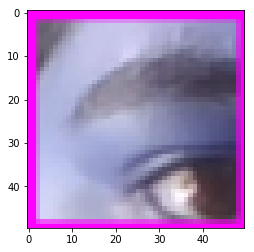

In [17]:
plt.imshow(data[0])